<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/05_02_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# YOu can write your own loss and metrics or optimizer functions
# imdb -> lot of movie reviews
# tensorflow's keras -> has a dirty version of imdb 
# it is dirty because of improper data cleaning
# so we will need to adjust it manually # this is a problem with this specific version of tf only


In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [0]:
imdb = keras.datasets.imdb

In [6]:
#dir(imdb)
#imdb.__dict__
HP_dictionary_size = 10000
(trainx, trainy),(testx,testy) = imdb.load_data(num_words=HP_dictionary_size)

# EnGLISH 

17465344/17464789 [==============================] - 0s 0us/step


In [9]:
#trainx[0]
#print(len(testx))
# since we have so much data, we will use some of it for validation 
# SUBSET-> every time the epoch is complete, it will validate the result against validation set also. 
# after entire cycle is done, only then testing data will be predicted
# much better educated guess
# trainx-> 25,000
# test-> 15,000
# vali -> 10,000
#print(decoder(trainx[2]))
trainy[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [10]:
trainx[0] # an english sentence has been converted to numbers for us
word_index = imdb.get_word_index()
for word,i in word_index.items():
  print(i)
  print(word)
  if int(i)>30:
    break

# DICTIONARY-> UNORDERED , INDEXED 

1646592/1641221 [==============================] - 0s 0us/step
34701
fawn


In [0]:
# bunch of data cleaning that happens 
# certain rules that every NLP engineers follow
# imdb dataset-> these rules were missed 
# we place certain special words inside our regular data which we know users will not type
# and we use those words to identify the structure of our string
# <START> -> tells you beginning of the data 
# i have taken only 10,000 words. But in sentiments, there will more than that, such words are marked
# as unknowns! <UNK> 
# <PAD> 0       WHEREVER WE WANT THE WEIGHT OF A WORD TO BE 0-> it should have no impact on learning. w1*<PAD>=0
# <START> 1     Indicates starting of a input data
# <UNK> 2       Unknowns, exist in dictionary but we are not considering them
# <UNUSED> 3    developers can use this in their own context
# ONLT FOR THIS CASE, we are doing this manually
# otherwise, expect this to be done as a part of data cleaning 
# but there would be existing values on 0,1,2,3!!!!
# before inserting, shift these values
# Our indexing starts for 0, but this dataset indexes for 1
# SENTENCE ->dict(sentence) -> NUMBERS [23 24 24 42 42 1012]
word_index = {k:(v+3) for k,v in word_index.items()} # word_index <- word, get a number
word_index["<PAD>"]=0 # lambdas, list comprehensions -> DICTIONARY comprehension
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3
dictionary = {v:k for k,v in word_index.items()} #reverse-> i want to pass number and get word

In [0]:
for i,word in dictionary.items():
  print(i)
  print(word)
  if int(i)>30:
    break

34704
fawn


In [0]:
def decoder(text):
  decoded_text = [dictionary.get(word_index) for word_index in text]
  sentence = ' '.join(decoded_text)
  return sentence # en_gb, en_us, en_in, hi_in 

In [13]:
sentiment = {1:'Positive',0:'Negative'}
for i in range(20):
  print(decoder(trainx[i]))
  print(sentiment.get(trainy[i]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

In [0]:
#for i in range(20):
 # print(len(decoder(trainx[i])))

# I will decide a size. All sentences longer than that will be chopped. 
# MAXSIZE = 256 words 
# Longer sentence -> first 256 words-> chop them up! 
# SHORTER sentences? -> PAD them up!
# I am a good boy <PAD> <PAD> <PAD> <PAD> <PAD> 
# 1 2  3  4  5 0 0 0 0 0
# y = w1*1 + w2*2... w5*5 + w6*0 + w7*0 ... w10*0 + bias
# chopping_size = 10 words
# y = w1*1 + w2*2..... w10* + bias 
# 2 or 3

In [0]:
# inbuilt keras method to do all this padding and chopping for us
trainx_padded = keras.preprocessing.sequence.pad_sequences(trainx, value=0, padding='post', maxlen=256)
#decoder(trainx_padded[3])
# PAD Testx also
testx_padded = keras.preprocessing.sequence.pad_sequences(testx,padding='post',maxlen=256, value=0)

In [0]:
#for i in range(20):
#  print(decoder(trainx_padded[i]))

In [0]:
HP_vocab = 10000
HP_l1 = 16
HP_l2 = 16
HP_epochs = 50
HP_maxlen = 256
HP_batchsize = 128

In [0]:
model = keras.Sequential()
model.add(keras.layers.Embedding(HP_vocab, HP_l1))
model.add(keras.layers.GlobalAveragePooling1D()) # no parameter! Average is fixed, cannot be manipulated
# EVERY NEURAL NETWORK IS HARDCODED -> EVERY LAYER CAN ONLY DECIDE THE OUTPUT SIZE, NOT It's input size. 
# the only exception to above rule is INPUT_LAYER
# EVERY OTHER LAYER HAS TO INPUT EVERYTHING GIVEN TO IT
# Average Pooling has no learning, hence no new weights are calcualted on this layer
model.add(keras.layers.Dense(HP_l2, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))


In [42]:
model.summary()
# First Layer
# Our Input Size was as follows:
# First our sentence of 256 words is multiplied with our Dictionary matrix to arrive at 10,000X1 sized vector.
# This vector is representation of your review-> 
# I am good <PAD>... <PAD>-> [ 0 0 0.1 0 0 0.2 0 0 0.3 0 0...0 ] # 10,000 elements
# I am bad <PAD>... <PAD>-> [ 0 0 0.1 0 0 0.2 0 0.4 0 0 0...0] # 10,000 elements 
# Embedding layer will further break it down into N datapoints? why so? -> so that finer vectors can be created
# this is how normalization of vectors is handled 
# No. of parameters generated will be: 
# 16 type of vectors X 10,000 dictionary_words
# total_parameters_learnt = 16 X 10,000 = 160,000
# 2nd layer is Average Pooling-> simple math operation, nothing new learnt, hence no wts calculated
# 3rd layer -> input X output + bias -> 16 X 16 + 16 = 272
# 4th layer -> input X output + bias -> 16 X 1 + 1 = 17

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

In [0]:
# VALIDATION DATA FOR TRAINING
valx = testx_padded[:10000]
testx_updated = testx_padded[10000:]
valy = testy[:10000]
testy_updated = testy[10000:]
trainx_updated = trainx_padded
trainy_updated = trainy
# while fitting the model, i should use the above variable now
# FOR HYGIENE ONLY -> so that I have all variables written in one place to avoid mistakes


In [0]:
history = model.fit(trainx_updated, trainy_updated, epochs=HP_epochs, batch_size=HP_batchsize, 
                    validation_data=(valx,valy), verbose=0)
# 25,000 -> together in a single epoch
# 25,000 into groups of 512 each -> and then learn them as a batch of data 
# results in saving time and better learning -> it may result in overfitting (on very large epochs)
# whenever you put verbose=0, also put a printing function as CALLBACK, that prints '.'

The above are a sign of overfitting. My acc is 98.70 but val_acc is 86.48 significantly lower!!! 

In [46]:
results = model.evaluate(testx_updated, testy_updated)

15000/15000 [==============================] - 1s 40us/sample - loss: 1.2880 - acc: 0.8348


In [0]:
stats = history.history
val_acc = stats['val_acc']
acc = stats['acc']
val_loss = stats['val_loss']
loss = stats['loss']
epochs = range(1, len(val_acc)+1)

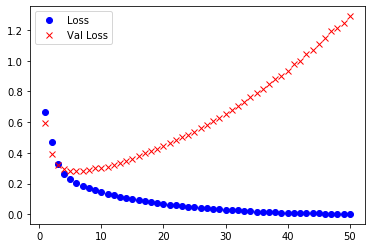

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, 'rx', label='Val Loss')
plt.legend()
plt.show()

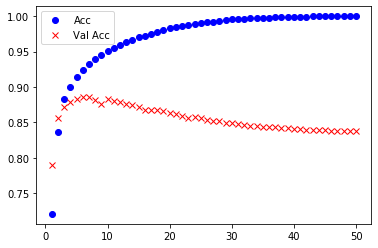

In [51]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(epochs, acc, 'bo', label='Acc')
plt.plot(epochs, val_acc, 'rx', label='Val Acc')
plt.legend()
plt.show()